## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using the same data as for the previous homeworks. Use the version you created called df2 where you already cleaned, dropped some of the variables but did not create dummy variables. Instead of creating dummy variables, you have to recode this column as suggested bellow.
Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a pdf file of your work.
Good luck!



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

# 2. Preprocessing

In our class we covered multiple classification methods. In this part of the home work you can compare them 

**Use the dataset 'auto_imports1.csv' from our previous homeworks. More specifically, use the version you created called df2 where you already cleaned, dropped some of the variables but DID NOT CREATE dummy variables. Follow the prompts to complete the homework.**

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#Read in data
df =pd.read_csv('auto_imports1.csv')

In [ ]:
df.head()
# to replace  "?"  with  Null values  inside the bore column

df['bore'].replace("?",np.nan,inplace=True)
# to replace  "?"  with  Null values  inside the stroke column

df['stroke'].replace("?",np.nan,inplace=True)
# to replace  "?"  with  Null values  inside the horse_power 

df['horse_power'].replace("?",np.nan,inplace=True)
# to replace  "?"  with  Null values  inside the peak_rpm

df['peak_rpm'].replace("?",np.nan,inplace=True)

## Your code here

df2 = df.drop(['body' ,'engine_type' ,'cylinders'],axis=1)  # axis = 1 represent the columns , we select columns
df2.dropna(inplace =True )

## .dropna() is a function to drop all the rows that containing atliest one null values present in it

In [2]:
df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# to replace  "?"  with  Null values  inside the bore column

df['bore'].replace("?",np.nan,inplace=True)

In [4]:
# to replace  "?"  with  Null values  inside the stroke column

df['stroke'].replace("?",np.nan,inplace=True)

In [5]:
# to replace  "?"  with  Null values  inside the horse_power 

df['horse_power'].replace("?",np.nan,inplace=True)

In [6]:
# to replace  "?"  with  Null values  inside the peak_rpm

df['peak_rpm'].replace("?",np.nan,inplace=True)

In [7]:

## Your code here

df2 = df.drop(['body' ,'engine_type' ,'cylinders'],axis=1)  # axis = 1 represent the columns , we select columns


In [8]:
df2.dropna(inplace =True )

## .dropna() is a function to drop all the rows that containing atliest one null values present in it


In [9]:
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
197,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
198,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
199,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.4,23.0,106,4800,26,27,22470


## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [10]:
#Your code
df2['fuel_type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
196       gas
197       gas
198       gas
199    diesel
200       gas
Name: fuel_type, Length: 195, dtype: object

In [11]:
df2['fuel_type'].unique()

array(['gas', 'diesel'], dtype=object)

In [12]:
fuel = {'gas':0, 'diesel':1}
df2['fuel_type'] = df2['fuel_type'].map(fuel)

In [13]:
df2['fuel_type']

0      0
1      0
2      0
3      0
4      0
      ..
196    0
197    0
198    0
199    1
200    0
Name: fuel_type, Length: 195, dtype: int64

## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [14]:
#your code

X = df2.drop(['fuel_type'],axis =1)

y= df2['fuel_type']



In [15]:
X.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fuel_type, dtype: int64

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [17]:
#your code

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=746)

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [18]:
#your code
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


logr = LogisticRegression()

#fiting model
logr.fit(X_train,y_train)



#predicing
pred_log = logr.predict(X_test)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### confusion matrix 

Text(50.722222222222214, 0.5, 'actual')

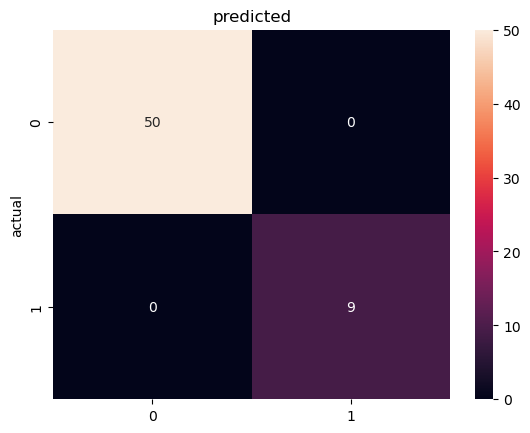

In [20]:
# confusion matrix 
cm = confusion_matrix(y_test,pred_log)
sns.heatmap(cm,annot=True)
plt.title('predicted')
plt.ylabel('actual')

### Classification Report

In [21]:
from sklearn.metrics import accuracy_score
log_acc = accuracy_score(y_test,pred_log)
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [22]:
#accuracy score
from sklearn.metrics import accuracy_score
log_acc = accuracy_score(y_test,pred_log)
print(log_acc)

1.0


### Auc score

In [23]:
log_reg_roc_score = roc_auc_score(y_test,pred_log)
print("the AUC score for Logistic regression is ", log_reg_roc_score)
fpr , tpr,thresold = roc_curve(y_test,pred_log)

the AUC score for Logistic regression is  1.0


Text(0, 0.5, 'False Positive Rate')

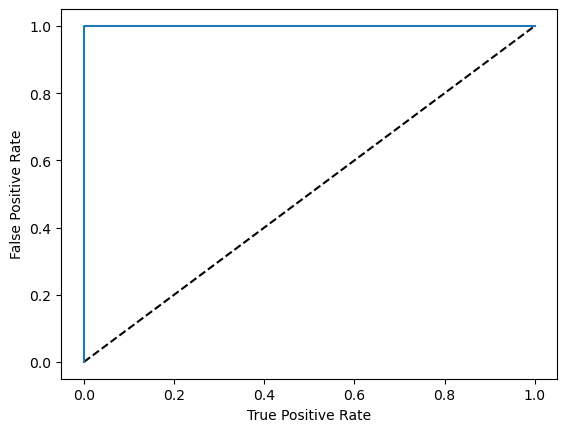

In [24]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

In [25]:
### plt

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [26]:
#your code
from sklearn.naive_bayes import GaussianNB



nb= GaussianNB()

#fiting model
nb.fit(X_train,y_train)



#predicing
pred_nb = nb.predict(X_test)


Text(50.722222222222214, 0.5, 'actual')

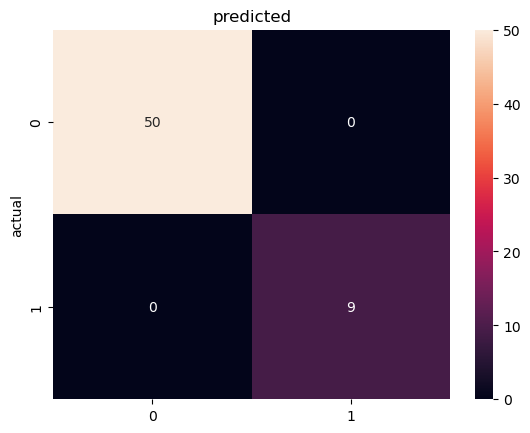

In [27]:
# confusion matrix
cm = confusion_matrix(y_test,pred_nb)
sns.heatmap(cm,annot=True)
plt.title('predicted')
plt.ylabel('actual')

In [28]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [29]:
#accuracy score
from sklearn.metrics import accuracy_score
nb_acc = accuracy_score(y_test,pred_nb)
print(nb_acc)

1.0


### AUC score  for Navie Bayes

In [30]:
nb_roc_score = roc_auc_score(y_test,pred_nb)
print("the AUC score for  Navie Bayes is ", nb_roc_score)
fpr , tpr, thresold = roc_curve(y_test,pred_nb)

the AUC score for  Navie Bayes is  1.0


Text(0, 0.5, 'False Positive Rate')

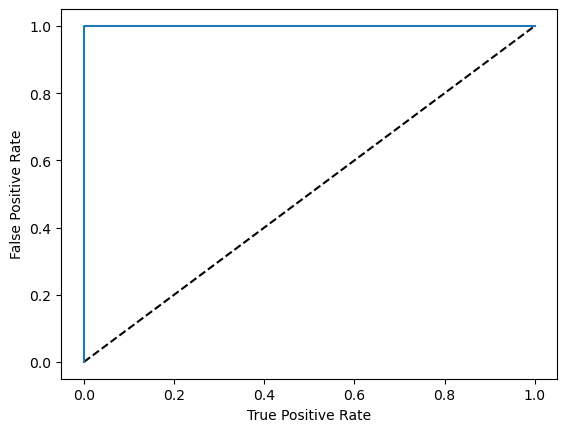

In [31]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

In [32]:
#your code

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#fiting model
knn.fit(X_train,y_train)



#predicing
pred_knn = knn.predict(X_test)


Text(50.722222222222214, 0.5, 'actual')

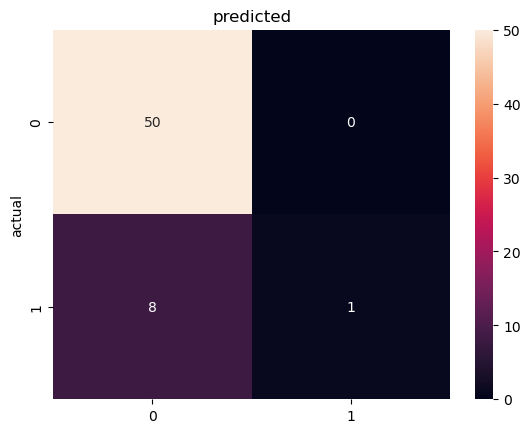

In [33]:
# confusion matrix
cm = confusion_matrix(y_test,pred_knn)
sns.heatmap(cm,annot=True)
plt.title('predicted')
plt.ylabel('actual')

In [34]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.11      0.20         9

    accuracy                           0.86        59
   macro avg       0.93      0.56      0.56        59
weighted avg       0.88      0.86      0.82        59



In [35]:
#accuracy score
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,pred_knn)
print(knn_acc)

0.864406779661017


## Auc Score for KNN

In [36]:
knn_roc_score = roc_auc_score(y_test,pred_knn)
print("the AUC score for  KNN classifier is ", knn_roc_score)
fpr , tpr, thresold = roc_curve(y_test,pred_knn)

the AUC score for  KNN classifier is  0.5555555555555556


Text(0, 0.5, 'False Positive Rate')

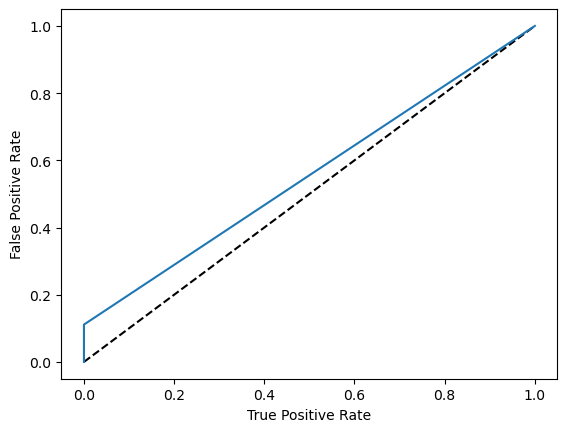

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [38]:
#your code
from sklearn.svm import SVC

svc = SVC()

#fiting model
svc.fit(X_train,y_train)



#predicing
pred_svc= svc.predict(X_test)

Text(50.722222222222214, 0.5, 'actual')

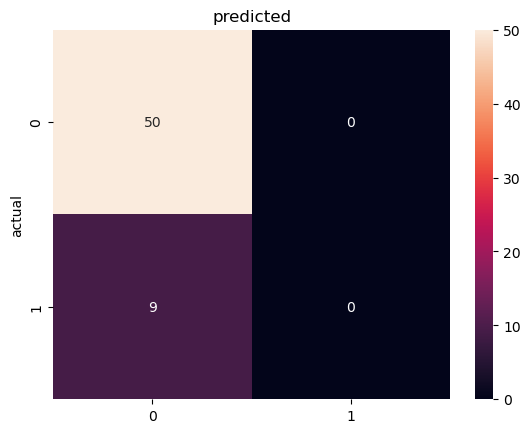

In [39]:
# confusion matrix
cm = confusion_matrix(y_test,pred_svc)
sns.heatmap(cm,annot=True)
plt.title('predicted')
plt.ylabel('actual')

In [40]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#accuracy score
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(y_test,pred_svc)
print(svc_acc)

0.847457627118644


## AUC score  for SVM

In [42]:
svc_roc_score = roc_auc_score(y_test,pred_svc)
print("the AUC score for  SVC  is ", svc_roc_score)

the AUC score for  SVC  is  0.5


Text(0, 0.5, 'False Positive Rate')

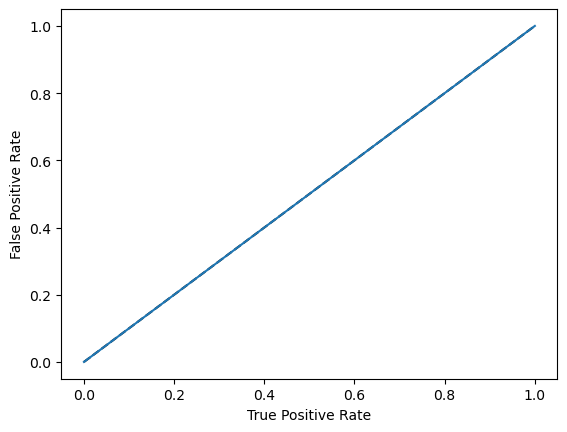

In [43]:
fpr , tpr, thresold = roc_curve(y_test,pred_svc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

In [44]:
#your answer 

models = ['Logistic regression','navie bayes','KNN' ,'SVM']
models_accurary = [log_acc,nb_acc,knn_acc,svc_acc]
models_auc = [log_reg_roc_score,nb_roc_score,knn_roc_score,svc_roc_score]
comp = pd.DataFrame({'MODELS':models,'TEST ACCURACY':models_accurary,'AUC score':models_auc})
comp


,MODELS,TEST ACCURACY,AUC score
0,Logistic regression,1.000000,1.000000
1,navie bayes,1.000000,1.000000
2,KNN,0.864407,0.555556
3,SVM,0.847458,0.500000


### from above it was clear that the Model Logistic Regression and Navie Bayes have performed well in both ACCURACY and AUC score,
### here both the perormance of models  Logistic regression and navie bayes  is poor in accuracy and AUC score, but the AUC score was poor of KNN AND SVM which stands at 0.55 for both KNN SVM

## 4. Bonus question
**Try to fix the imbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferably one that "failed" before) and see if you get better results.**

### To Implement the SMOTE technique the following necessary packages has to be installed

In [ ]:
#your code
pip install -U imbalanced-learn

In [ ]:
pip install imbalanced-learn

### we took the random_state = 746  while applying SMOTE

In [47]:
labels_dict = {'gas':0,'diesel':1}
print(labels_dict)

print("instances per label in training set\n", y.value_counts())

{'gas': 0, 'diesel': 1}
instances per label in training set
 0    175
1     20
Name: fuel_type, dtype: int64


#### Before applying SMOTE Shapes of X and Y

In [48]:
print(" before  smote over sampling the shape of X is ")
print(X.shape)
print(" before  smote over sampling the shape of y is ")
print(y.shape)

 before  smote over sampling the shape of X is 
(195, 14)
 before  smote over sampling the shape of y is 
(195,)


In [49]:


## training data sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

smote = SMOTE(sampling_strategy='not majority', n_jobs=3,random_state=746)

X_resample, y_resample = smote.fit_resample(X, y)


In [50]:
print(" after applying SMOTE the result y is  ")
counter = Counter(y_resample)
print(counter)

 after applying SMOTE the result y is  
Counter({0: 175, 1: 175})


In [51]:
X_resample

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,88.600000,168.800000,64.100000,48.800000,2548,130,3.47,2.68,9.000000,111.0,5000.0,21,27,13495
1,88.600000,168.800000,64.100000,48.800000,2548,130,3.47,2.68,9.000000,111.0,5000.0,21,27,16500
2,94.500000,171.200000,65.500000,52.400000,2823,152,2.68,3.47,9.000000,154.0,5000.0,19,26,16500
3,99.800000,176.600000,66.200000,54.300000,2337,109,3.19,3.4,10.000000,102.0,5500.0,24,30,13950
4,99.400000,176.600000,66.400000,54.300000,2824,136,3.19,3.4,8.000000,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,109.498370,192.528950,67.888953,57.473488,3140,133,3.464918,3.479116,21.681396,85.801158,4269.244247,27,29,13854
346,94.624783,165.403985,63.862391,54.344022,2043,103,3.019116,3.457522,21.962391,55.103985,4768.804352,43,48,7182
347,114.200000,198.900000,68.400000,58.700000,3471,152,3.7,3.52,21.000000,95.0,4150.0,25,25,16286
348,109.174635,188.326802,69.620287,56.160144,3383,175,3.555725,3.64,21.580918,114.746347,4325.724551,23,27,24385


In [52]:
y_resample.value_counts()

0    175
1    175
Name: fuel_type, dtype: int64

### Again Splitting  your resampled data into training and testing set. Use test_size=0.3, random_state=746 

In [53]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_resample,y_resample,test_size=0.3,random_state=746)

## we have seen clearly the above models , of which one that had least accuaracy was 
### Support Vector Classifier and KNearestNeighbour Classifiers, hence we can once again implement those algorithmsn with our SMOTE oversample data

## SVM  applied on oversampled data using SMOTE

In [54]:
#your code

#your code
from sklearn.svm import SVC

svc = SVC()

#fiting model
svc.fit(X_train1,y_train1)



#predicing
pred_svc1= svc.predict(X_test1)


Text(33.0, 0.5, 'actual')

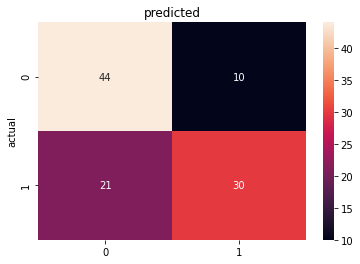

In [55]:
# confusion matrix
cm = confusion_matrix(y_test1,pred_svc1)
sns.heatmap(cm,annot=True)
plt.title('predicted')
plt.ylabel('actual')


In [56]:
print(classification_report(y_test1,pred_svc1))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        54
           1       0.75      0.59      0.66        51

    accuracy                           0.70       105
   macro avg       0.71      0.70      0.70       105
weighted avg       0.71      0.70      0.70       105



In [57]:
#accuracy score
from sklearn.metrics import accuracy_score
svc_acc_smote = accuracy_score(y_test1,pred_svc1)
print(svc_acc_smote)

0.7047619047619048


### AUC score 

In [58]:
svc_roc_score_smote = roc_auc_score(y_test1,pred_svc1)
print("the AUC score for  svc  is ", svc_roc_score_smote)

the AUC score for  svc  is  0.701525054466231


Text(0, 0.5, 'False Positive Rate')

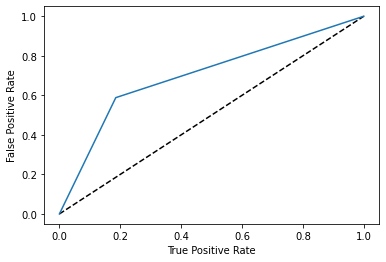

In [59]:
fpr,tpr,thresold = roc_curve(y_test1,pred_svc1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

## KNN  applied on OVERSAMPLED data using SMOTE

In [60]:
#your code

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#fiting model
knn.fit(X_train1,y_train1)



#predicing
pred_knn1 = knn.predict(X_test1)


Text(33.0, 0.5, 'actual')

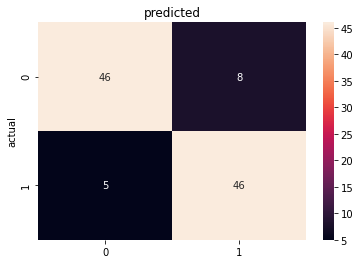

In [61]:
# confusion matrix
cm = confusion_matrix(y_test1,pred_knn1)
sns.heatmap(cm,annot=True)
plt.title('predicted')
plt.ylabel('actual')

In [62]:
print(classification_report(y_test1,pred_knn1))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.85      0.90      0.88        51

    accuracy                           0.88       105
   macro avg       0.88      0.88      0.88       105
weighted avg       0.88      0.88      0.88       105



In [63]:
#accuracy score
from sklearn.metrics import accuracy_score
knn_acc_smote = accuracy_score(y_test1,pred_knn1)
print(knn_acc_smote)

0.8761904761904762


### AUC Curve

In [64]:
knn_roc_score_smote = roc_auc_score(y_test1,pred_knn1)
print("the AUC score for  KNN after SMOTE is ", knn_roc_score_smote)

the AUC score for  KNN after SMOTE is  0.8769063180827886


Text(0, 0.5, 'False Positive Rate')

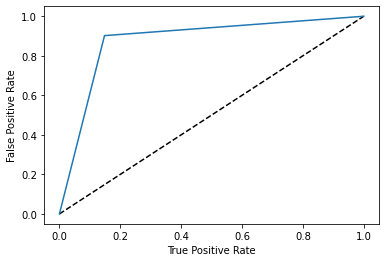

In [65]:
fpr,tpr,thresold = roc_curve(y_test1,pred_knn1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

### Comparision of Performance of Models KNN(KNearestneighbors) and SVC(Support vector Classifier) before and after applying SMOTE 

In [66]:
models1 = ['KNN' ,'KNN SMOTE APPLIED' ,'SVC' , 'SVC SMOTE APPLIED']
models_accurary1 = [knn_acc,knn_acc_smote,svc_acc,svc_acc_smote ]
models_auc1 = [knn_roc_score,knn_roc_score_smote,svc_roc_score,svc_roc_score_smote]
comp1 = pd.DataFrame({'MODELS':models1,'TEST ACCURACY':models_accurary1,'AUC score':models_auc1})
comp1

,MODELS,TEST ACCURACY,AUC score
0,KNN,0.864407,0.555556
1,KNN SMOTE APPLIED,0.876190,0.876906
2,SVC,0.847458,0.500000
3,SVC SMOTE APPLIED,0.704762,0.701525


### Hence from above table we see clerly that the AUC score has been improved for both KNearestNeighbour classifier and Support Vector Classifier as the AUC score has increased for both KNN and SVC